In [21]:
import io
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path
import pickle
import PIL
import torch
import torchvision
import urllib
import warnings
import sys

sys.path.append(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..'))
from attacks import eot_attacks
from attacks import utils

from utils import datasets
from utils import labels_util

# Disable annoying UserWarning caused by using nn.Upsample
# in the relighting model.
warnings.filterwarnings("ignore", category=UserWarning) 

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
config = {}
config['classif_model_name'] = 'pubfig_facenet'
config['relight_model_name'] = 'dpr'

dpr_modelFolder = '../relighters/DPR/trained_model/'
checkpoint_path = os.path.join(dpr_modelFolder, 'trained_model_03.t7')

relight_model = utils.load_relighting_model(config['relight_model_name'], checkpoint_path)
classif_model = utils.load_classification_model(config['classif_model_name'])

idx_to_label = labels_util.load_idx_to_label('pubfig10')
label_to_idx = {label : idx for idx, label in idx_to_label.items()}

Loaded the relighter: dpr.
Loaded classifier: pubfig_facenet.


5 5


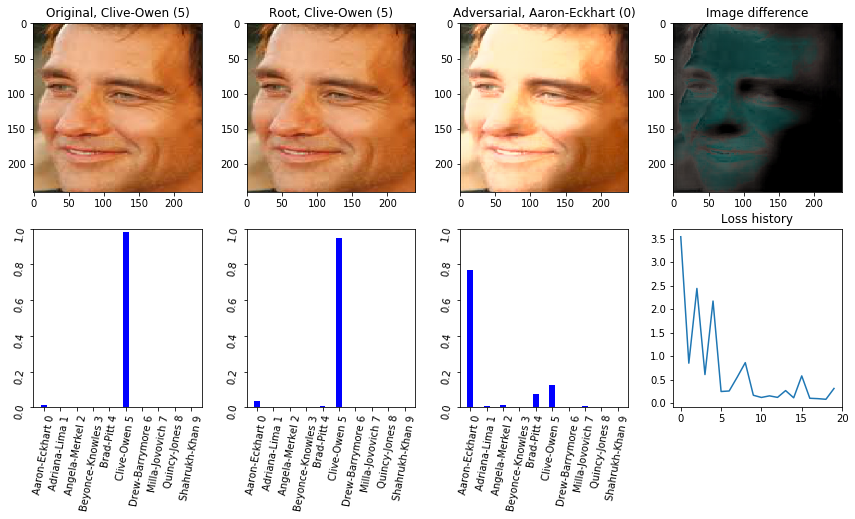

5 5


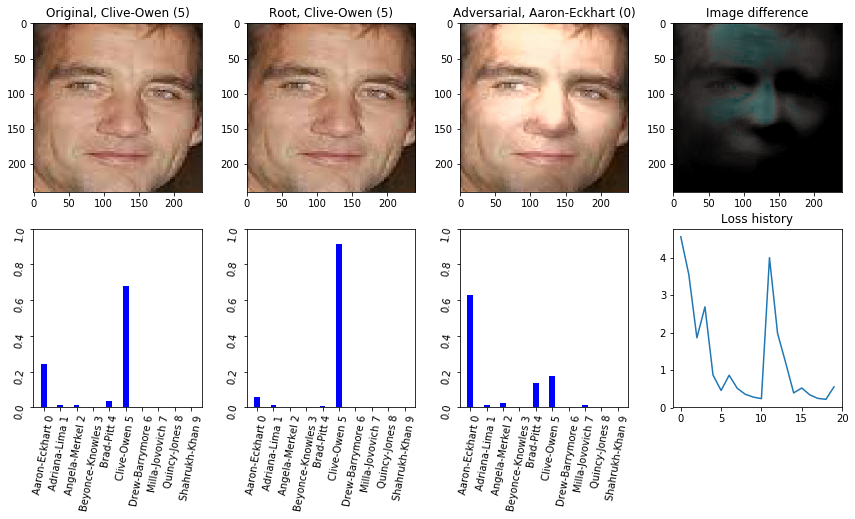

5 5


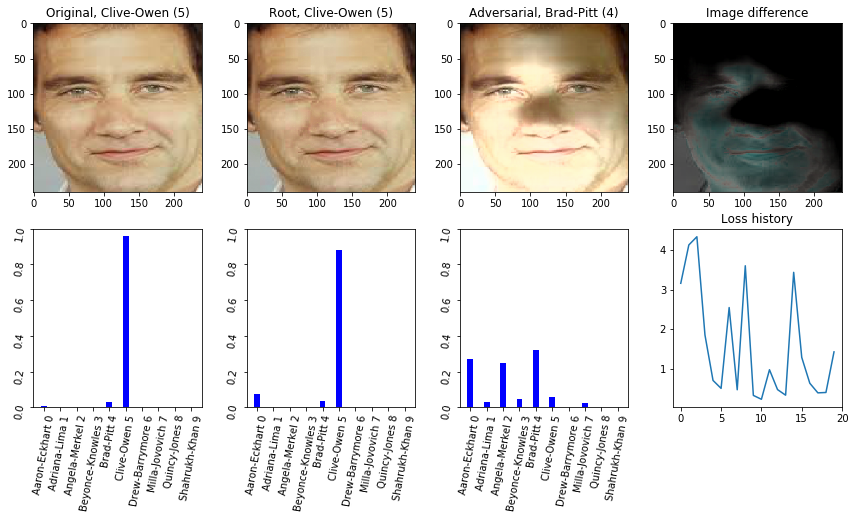

5 5


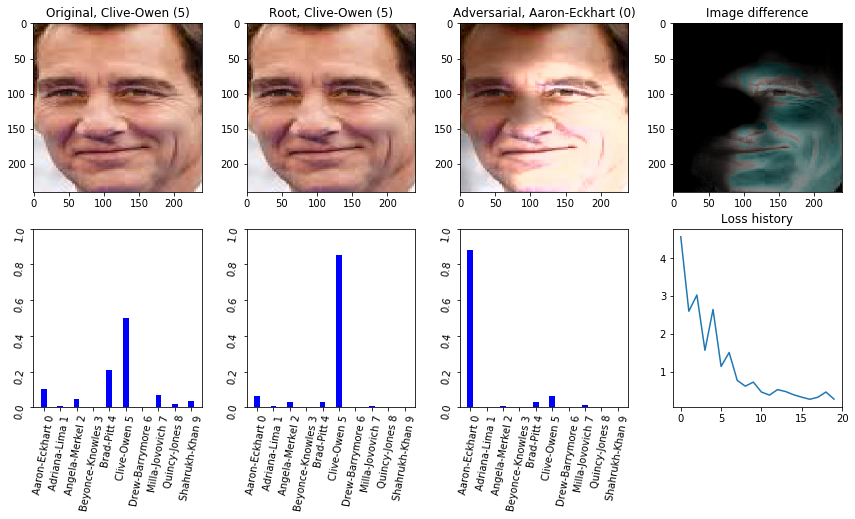

6 6


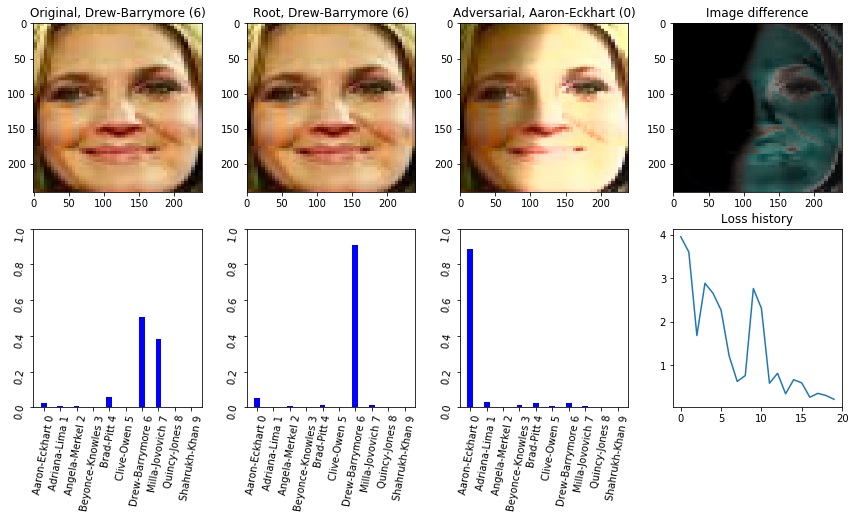

6 6


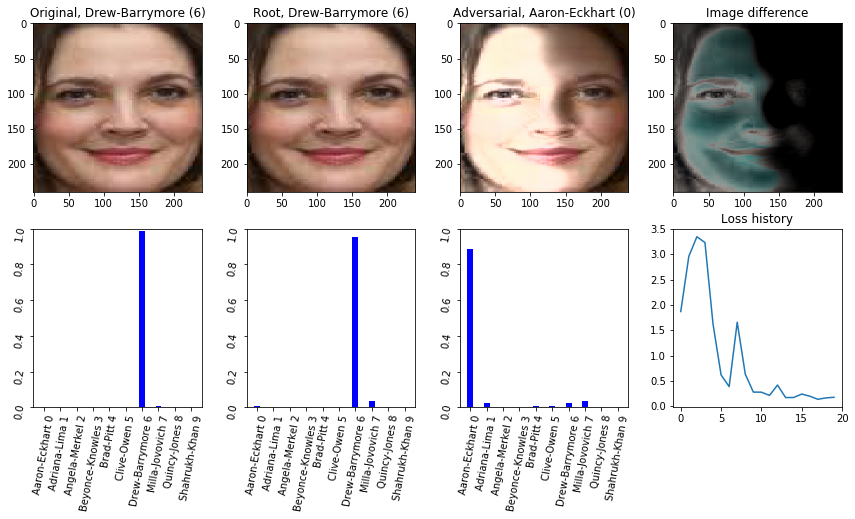

6 6


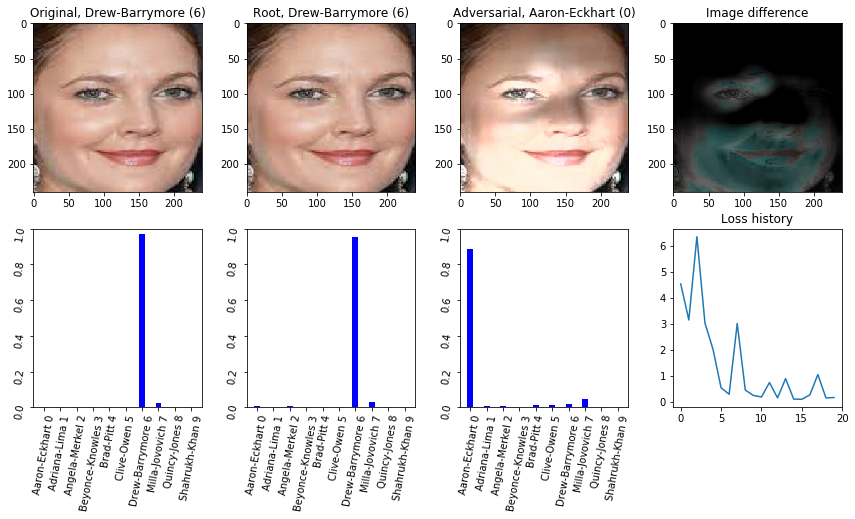

6 6


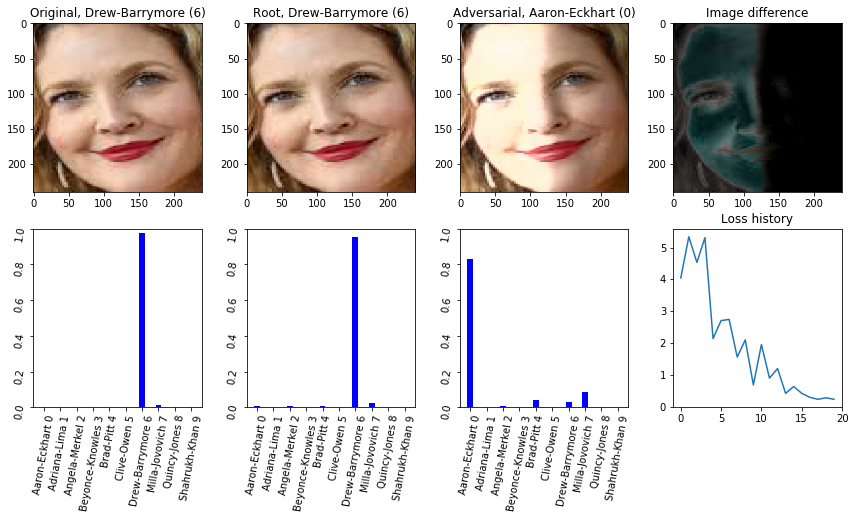

0 0


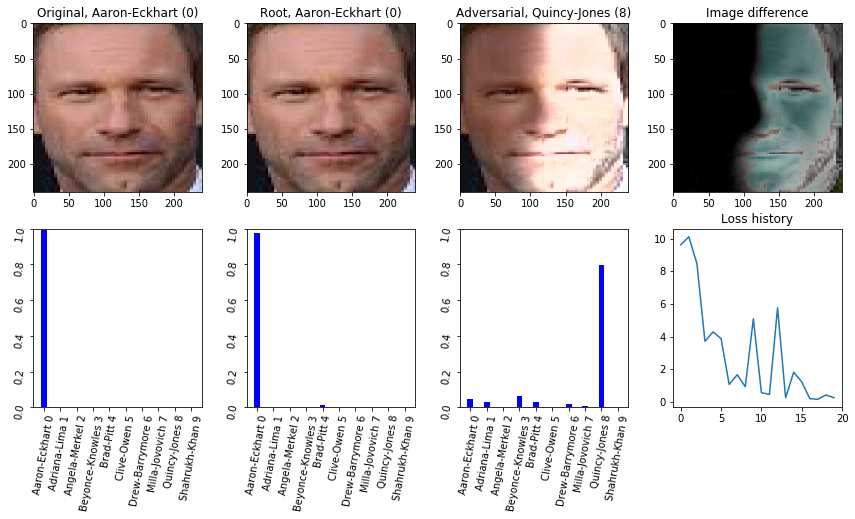

0 0


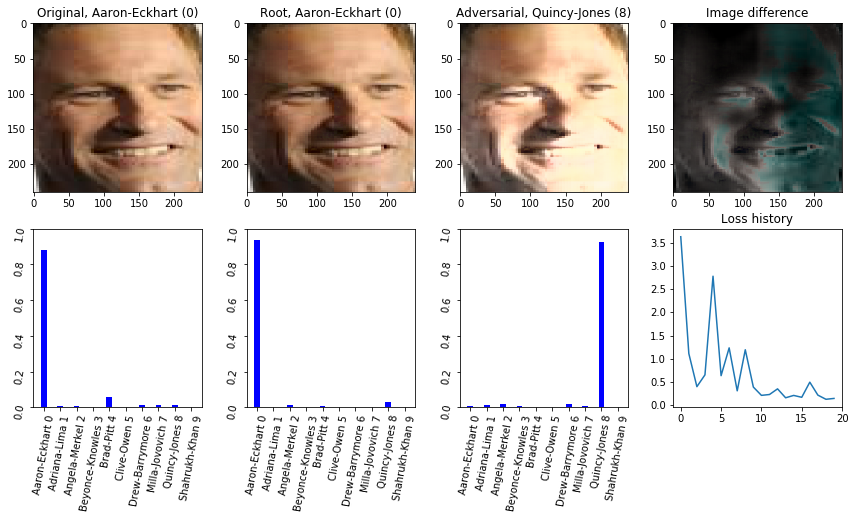

0 0


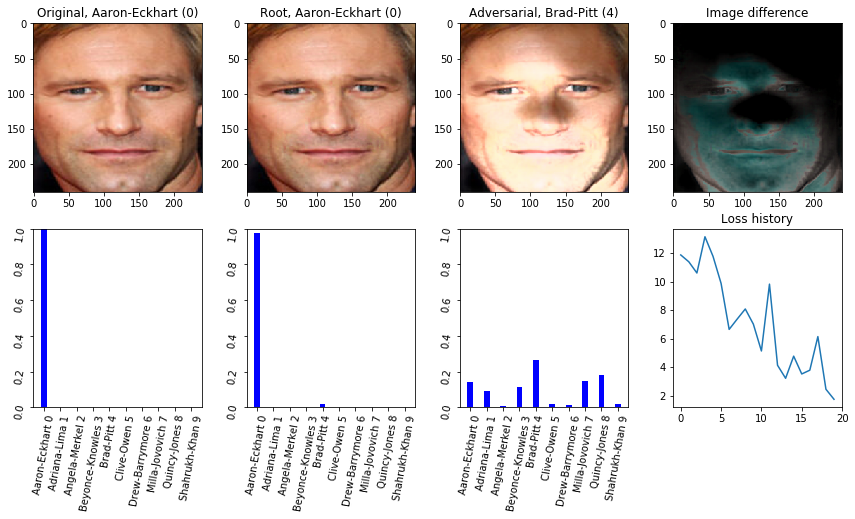

0 0


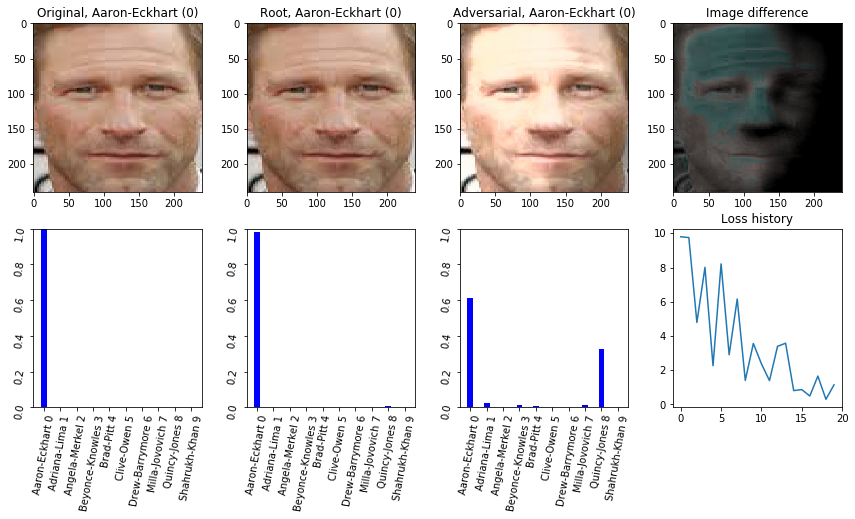

3 3


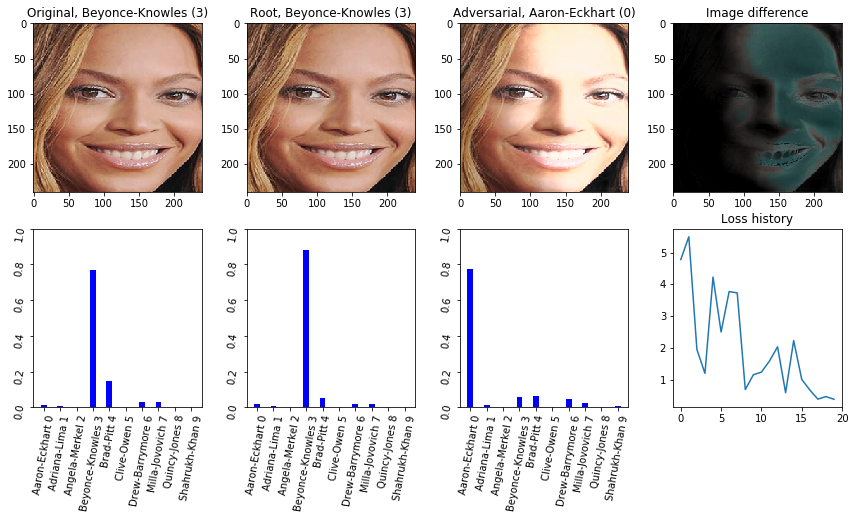

4 3
3 3


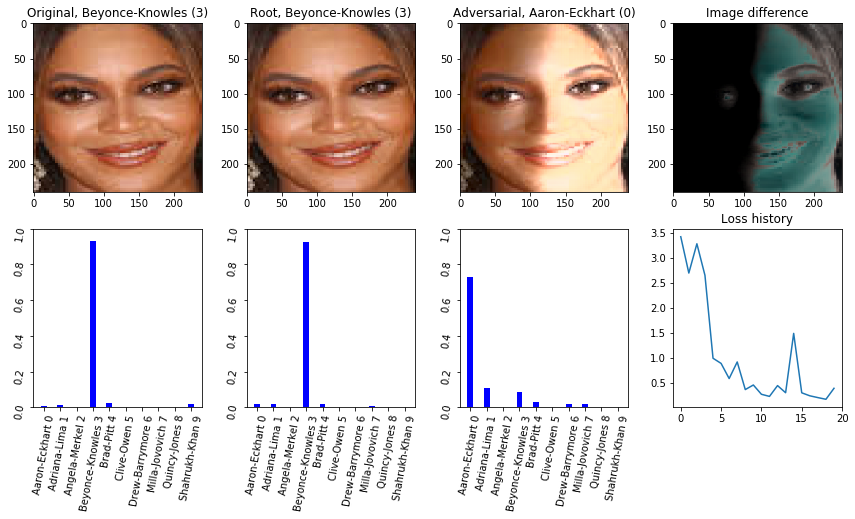

3 3


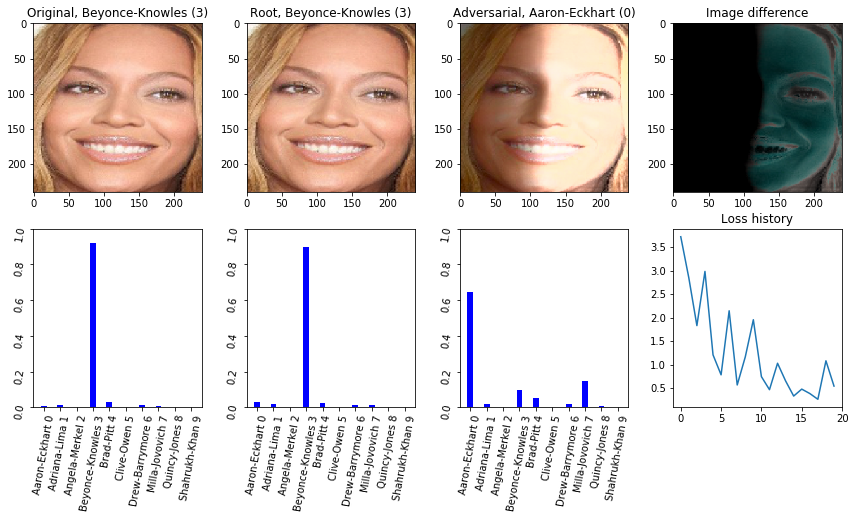

7 2
2 2


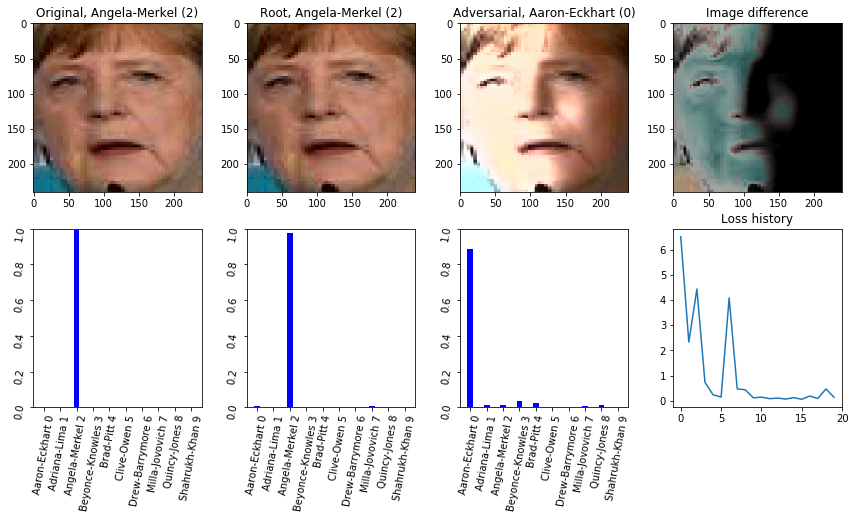

2 2


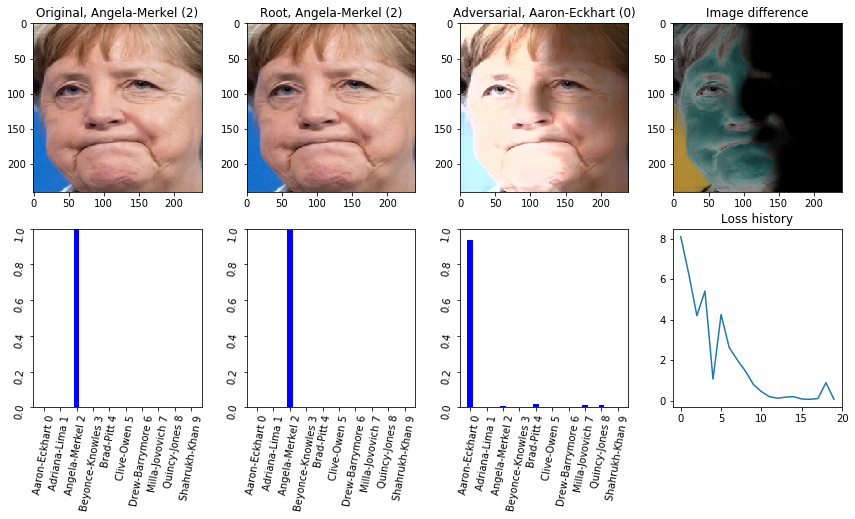

2 2


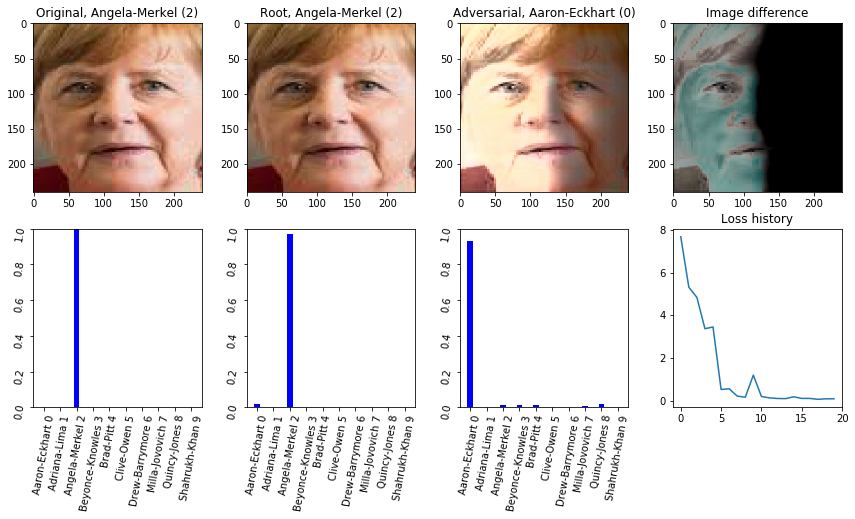

8 9
9 9


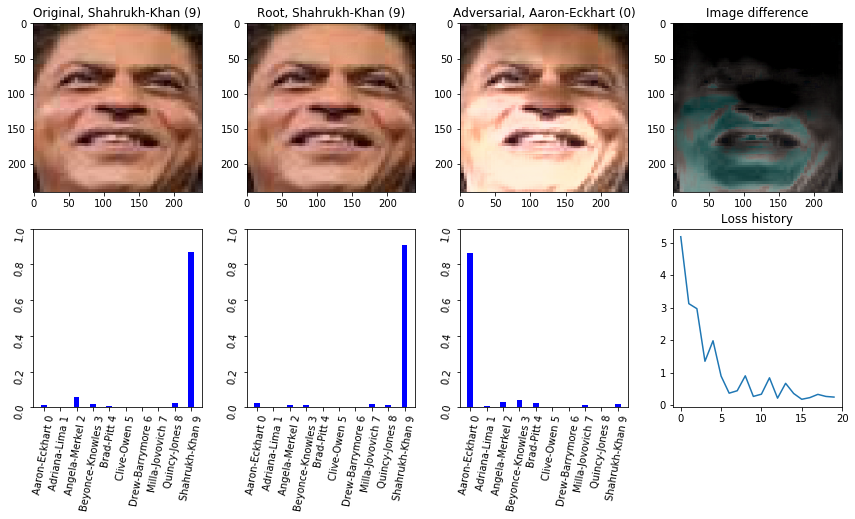

9 9


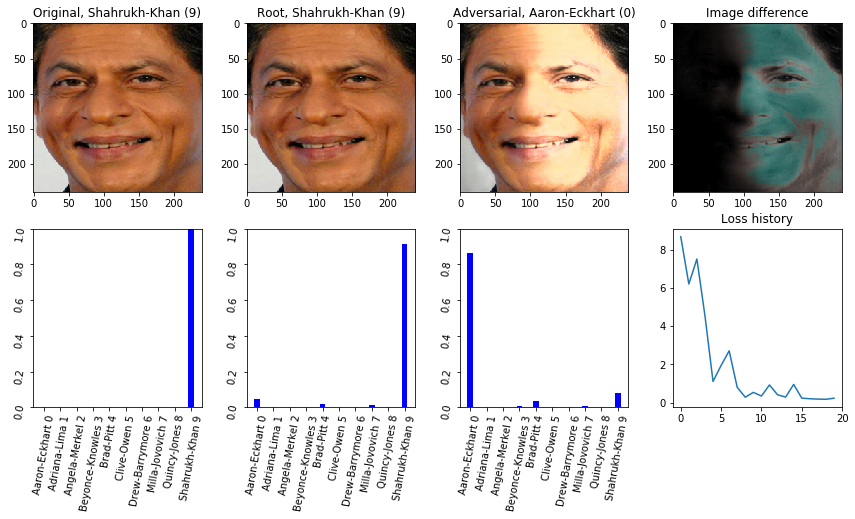

9 9


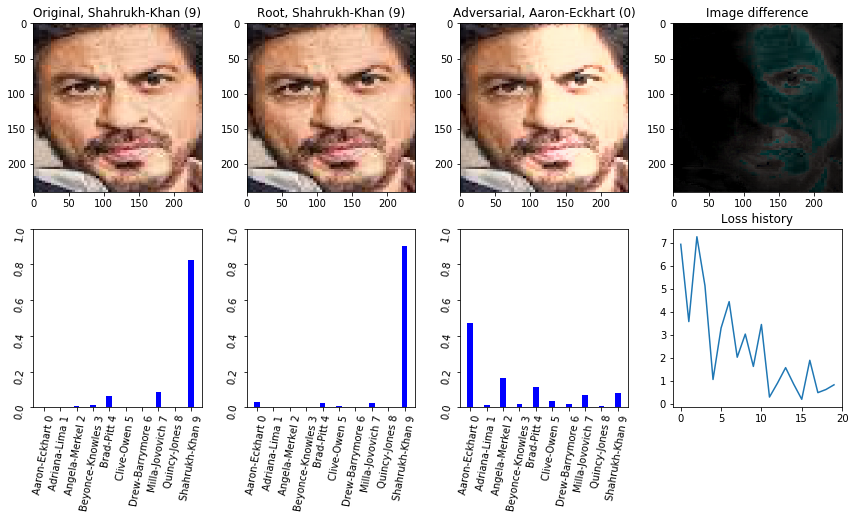

8 8


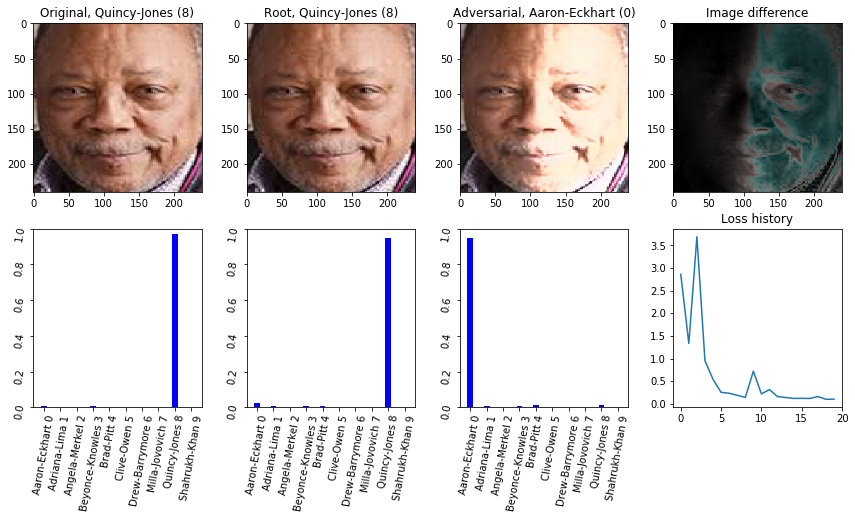

8 8


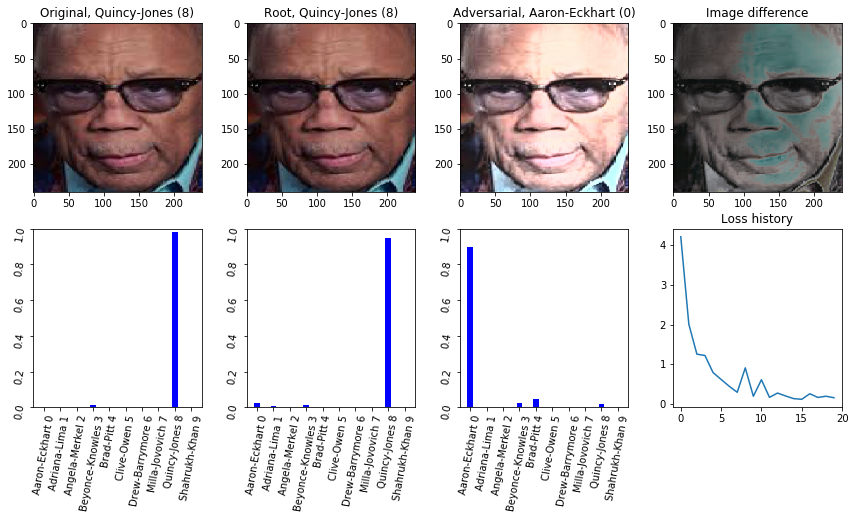

8 8


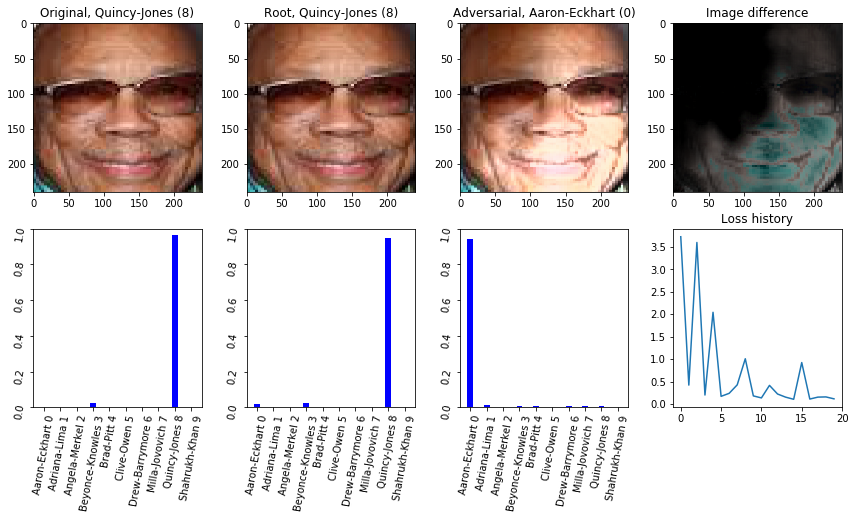

8 8


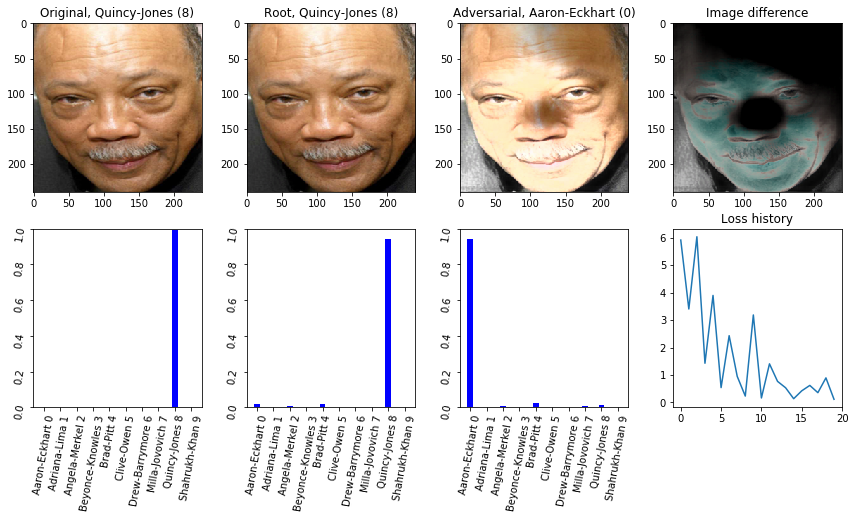

0 4
4 4


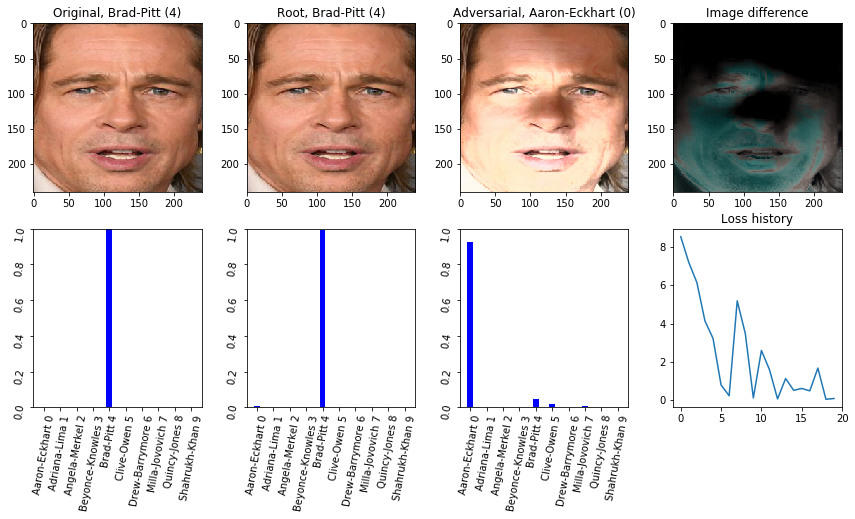

4 4


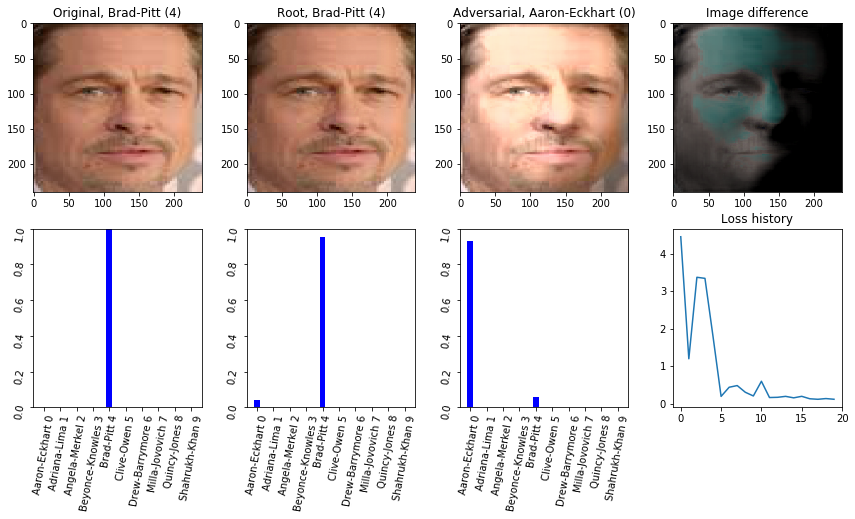

4 4


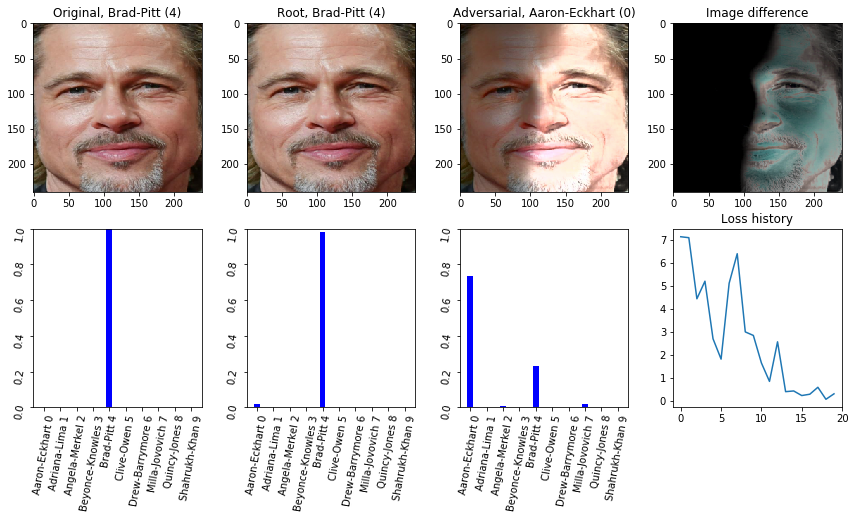

7 7


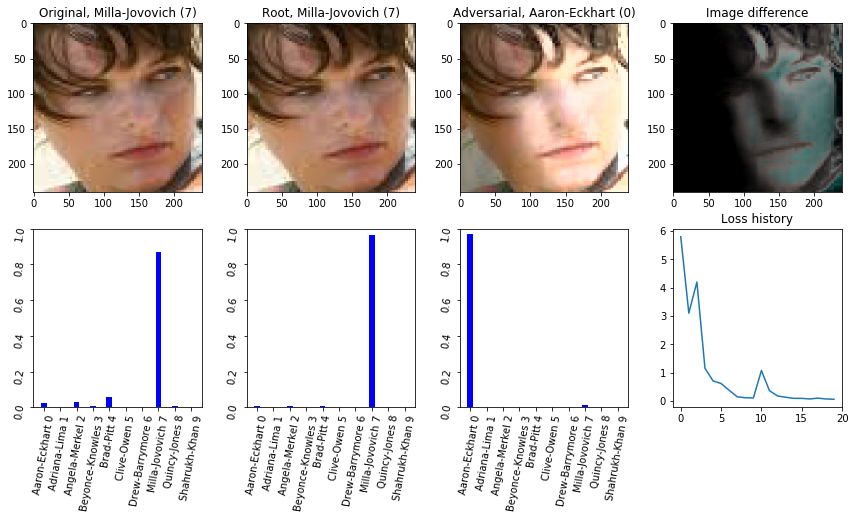

7 7


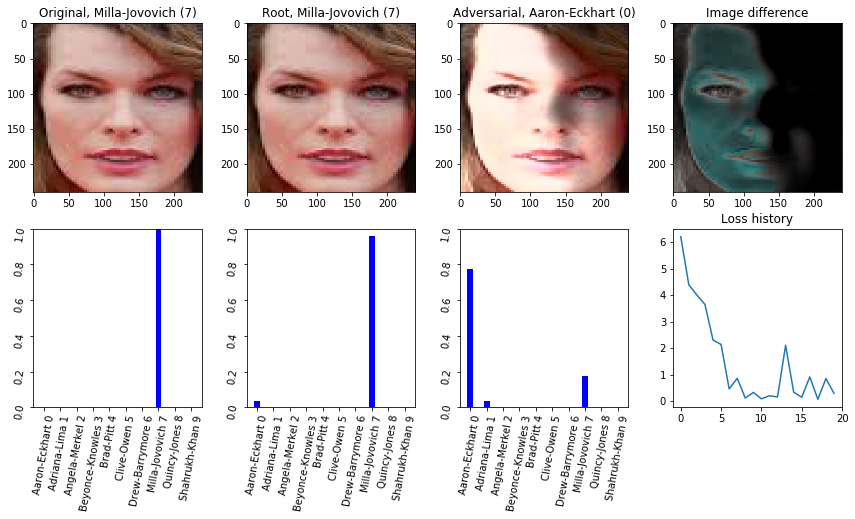

7 7


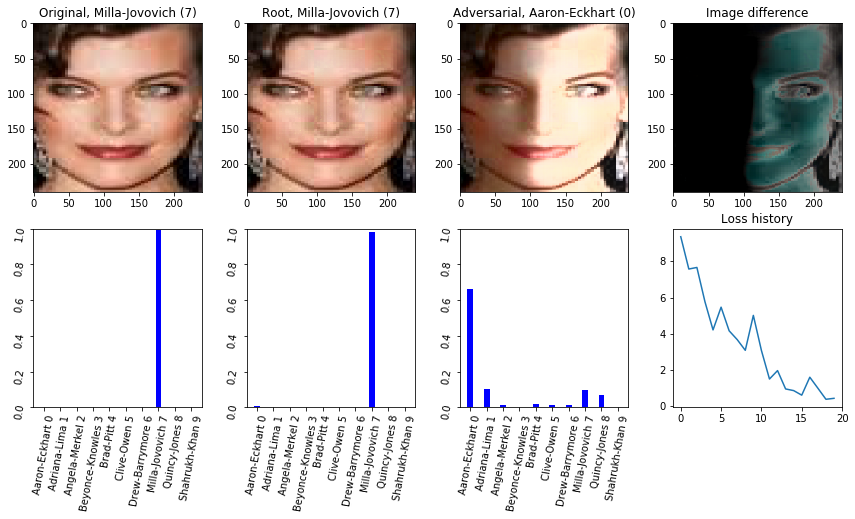

7 7


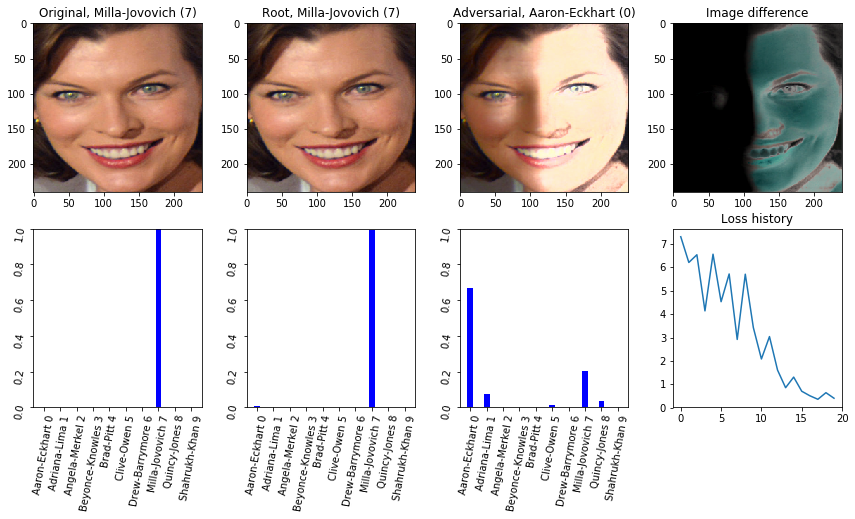

1 1


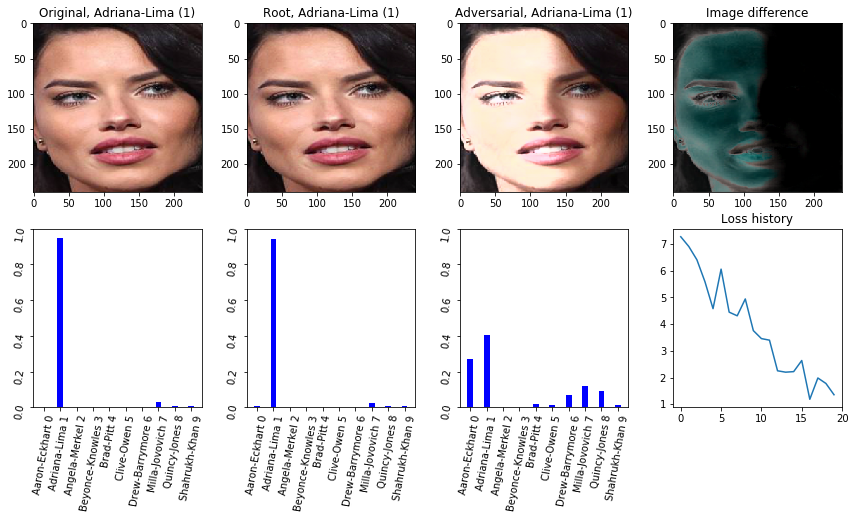

1 1


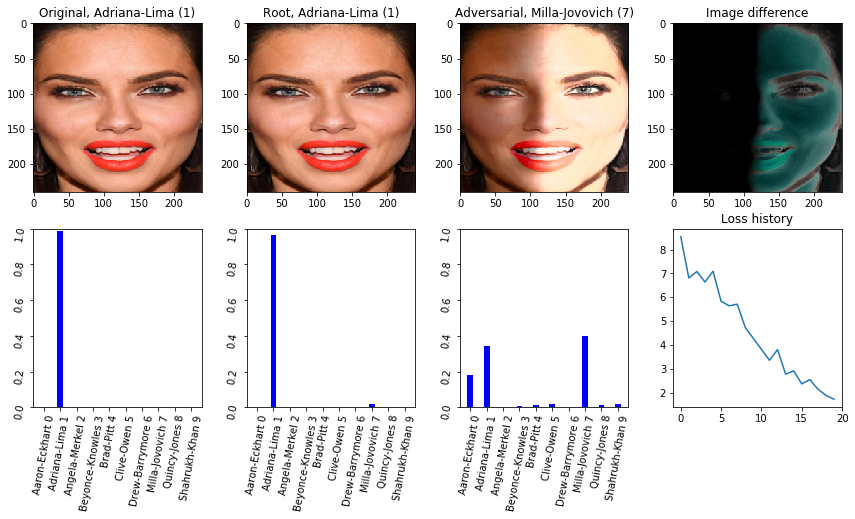

1 1


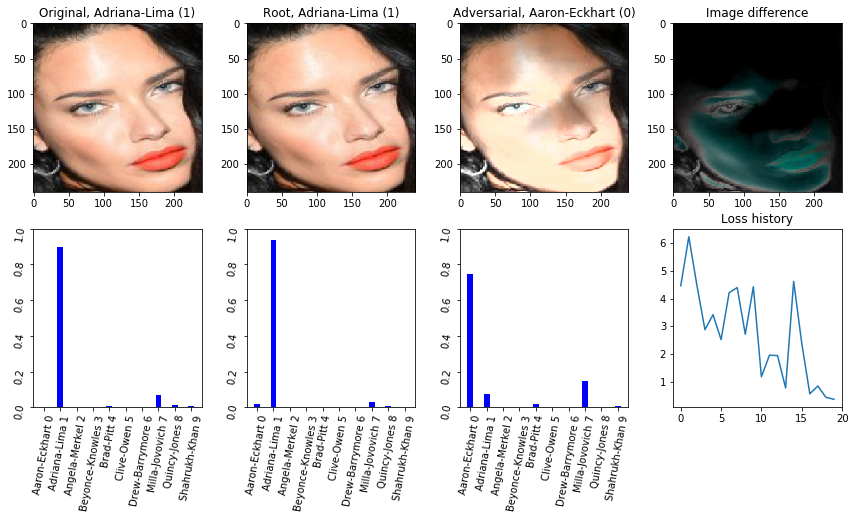

1 1


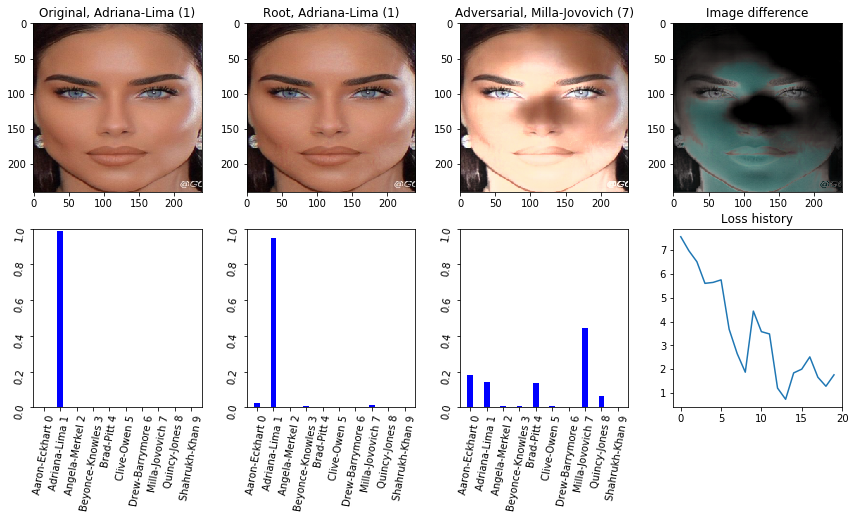

1 1


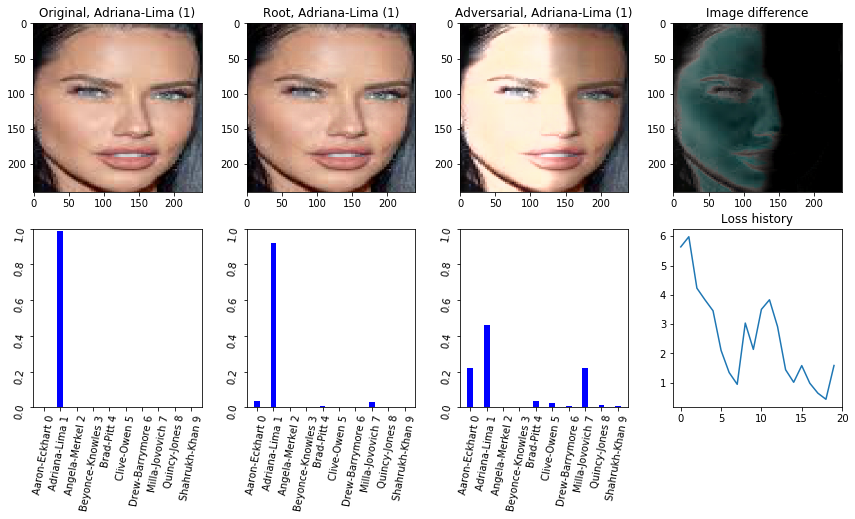

In [38]:
data_path = '../data/PubFig_test'

config['attack_type'] = 'class_constrained_eot'
config['target_label'] = 0
config['debugging'] = False
config['num_iterations'] = 20
config['learning_rate'] = 0.02
config['eps'] = 0.1

dataset = datasets.PubFigDataset('../data/pubfig/', mode='test', crop=True)

for idx in range(len(dataset)):
    img, gt_label = dataset[idx]
    
    config['gt_label'] = gt_label
    if gt_label == config['target_label']:
        config['target_label'] = 8

    result = eot_attacks.do_attack(relight_model, classif_model, img, config)
    
    print(result['orig_label'], gt_label)
    
    #if result['adv_label'] == config['target_label']:
    if 'root_img' in result:
        utils.visualize_attack(img, result, idx_to_label)    
        
    config['target_label'] = 0

gt: 5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


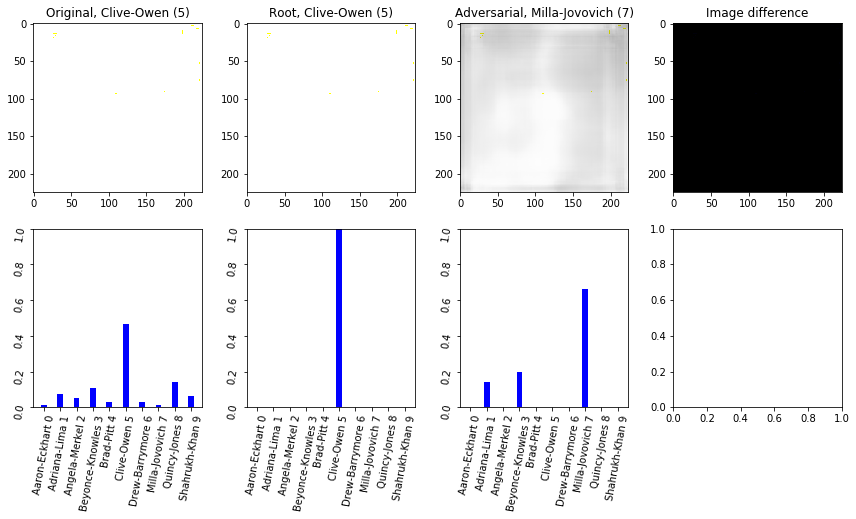

gt: 5


KeyboardInterrupt: 

In [4]:
# config['attack_type'] = 'random_root'
# config['batch_size'] = 64
# config['num_batches'] = 50
# config['num_classes'] = 10
# config['eps'] = 0.02

# dataset = datasets.PubFigDataset('../data/pubfig/', mode='test', crop=True)

# for idx in range(len(dataset)):
#     img, gt_label = dataset[idx]
    
#     print('gt:', gt_label)
#     config['gt_label'] = gt_label
#     if gt_label == config['target_label']:
#         config['target_label'] = 8

#     result = eot_attacks.do_attack(relight_model, classif_model, img, config)
#     utils.visualize_attack(img, result, idx_to_label)